# Trading breakout from consolidation with Crude Oil

In [2]:
import numpy as np
import pandas as pd

import bt
import talib
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

### Hyperparameter

In [3]:
min_max_window = 10 # 10 trading days, 2 weeks
regress_window = 10 # 


## Charting Daily price of Crude Oil

In [4]:
cl = yf.download("CL=F", start="2012-01-01", end="2016-12-31")
cl.columns = ["Close", "High", "Low", "Open", "Volume"]

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


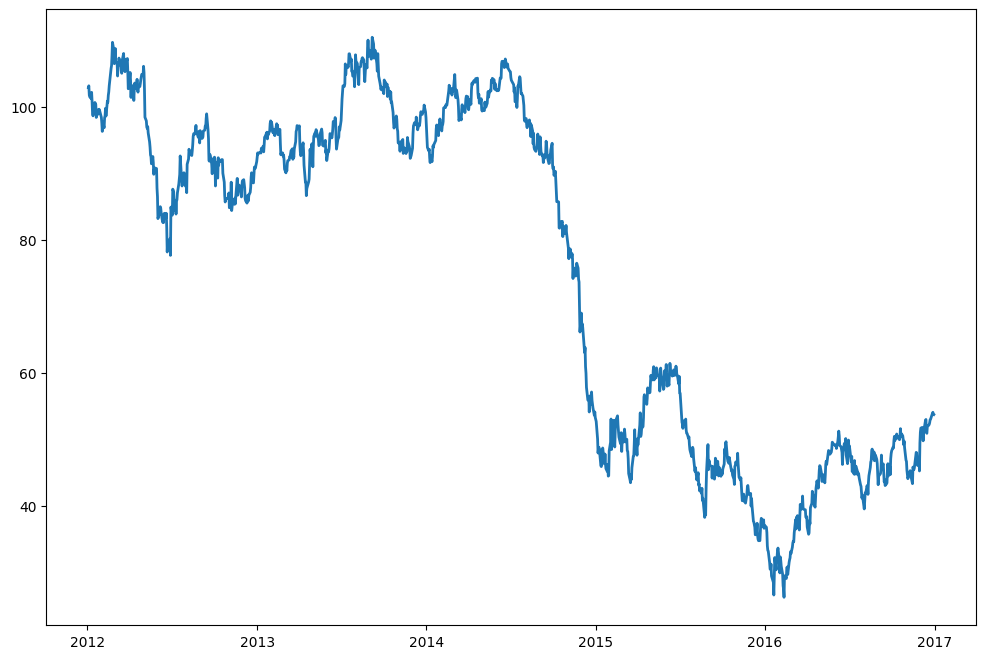

In [5]:
plt.figure(figsize=(12, 8))
plt.plot(cl["Close"], label="Close", linewidth= 2, color="C0")
plt.show()

In [6]:
def create_moving_averages(df, column_name, ma_func, periods):
    df1 = df.copy()
    for period in periods:
        df1[f"SMA{period}"] = ma_func(df1[column_name], timeperiod=period)

    return df1

cl = create_moving_averages(cl, "Close", talib.SMA, [5, 10, 20, 50, 100, 200])

In [7]:
cl["Max"] = cl["Close"].rolling(window=min_max_window).max()
cl["Min"] = cl["Close"].rolling(window=min_max_window).min()
cl["Max15"] = cl["Close"].shift(1).rolling(window=15).max()
cl["Min15"] = cl["Close"].shift(1).rolling(window=15).min()

cl["Adx"] = talib.ADX(cl["High"], cl["Low"], cl["Close"], timeperiod=14)


## Run linear regression on consolidation period

In [8]:
def regress_boundary(data):
    x = np.arange(0, data.shape[0])
    x = x.reshape(-1, 1)
    y = data
    model = LinearRegression()

    model.fit(x, y)
    predictions = model.predict(x)
    return predictions

In [9]:
cl2013a = cl.loc["2013-07":"2013-10"].copy()
upper = regress_boundary(cl2013a["Max"])
lower = regress_boundary(cl2013a["Min"])


Text(0.5, 1.0, 'ADX')

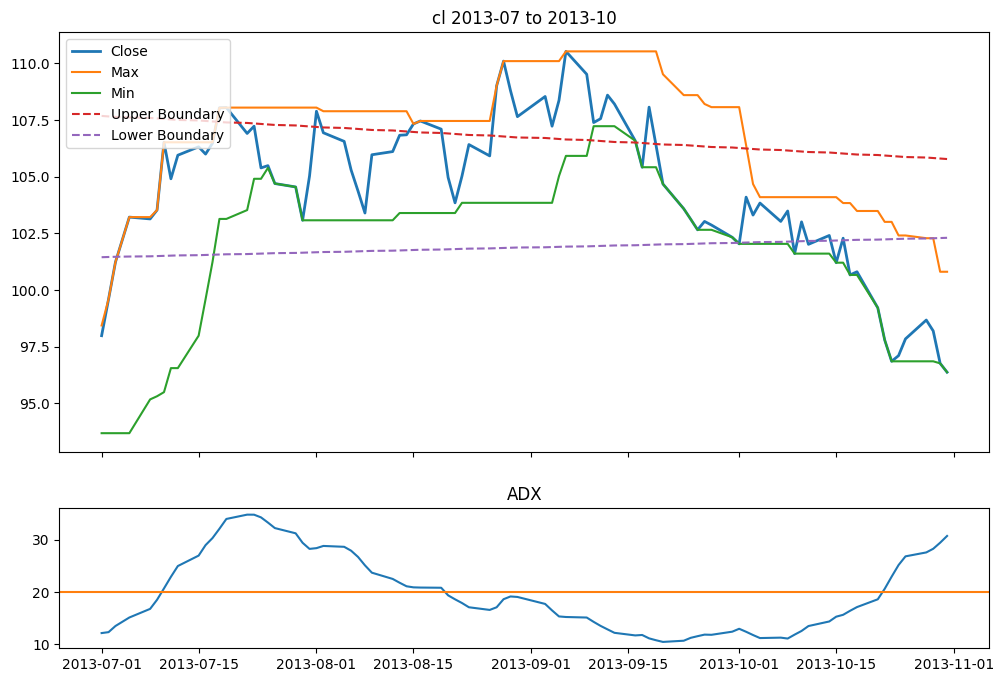

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), height_ratios=(3, 1), sharex=True)

ax1.plot(cl2013a.index, cl2013a["Close"], label="Close", linewidth= 2, color="C0")
ax1.plot(cl2013a.index, cl2013a["Max"], label="Max", color="C1")
ax1.plot(cl2013a.index, cl2013a["Min"], label="Min", color="C2")
ax1.plot(cl2013a.index, upper, label="Upper Boundary", color="C3", linestyle="--")
ax1.plot(cl2013a.index, lower, label="Lower Boundary", color="C4", linestyle="--")
ax1.set_title("cl 2013-07 to 2013-10")
ax1.legend(loc="upper left")

ax2.plot(cl2013a["Adx"], label="ADX", color="C0")
ax2.axhline(y=20, color="C1")
ax2.set_title("ADX")

In [11]:
cl2013a.shape[0]

87

the regression line is draw on a 80 day period. with Max() on a 10 day window. 
The length of the regression period, and the length of the Max(window= ) shifts the upper and lower edge. 
If we regress in the period 2013-07-15 and 2013-09-15, the boundary will fit the price channel much better. 

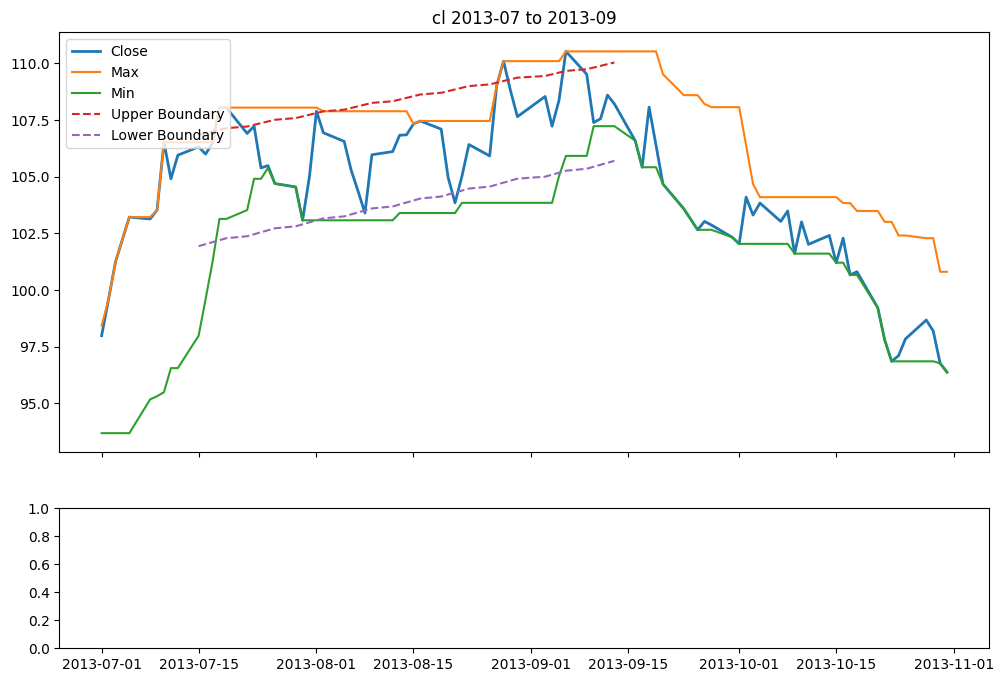

In [12]:
# cl2013b = cl.loc["2013-07-15":"2013-09-15"]
cl2013b = cl.loc["2013-07-15":"2013-09-15"]

upper2 = regress_boundary(cl2013b["Max"])
lower2 = regress_boundary(cl2013b["Min"])

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), height_ratios=(3, 1), sharex=True)

ax1.plot(cl2013a.index, cl2013a["Close"], label="Close", linewidth= 2, color="C0")
ax1.plot(cl2013a.index, cl2013a["Max"], label="Max", color="C1")
ax1.plot(cl2013a.index, cl2013a["Min"], label="Min", color="C2")
ax1.plot(cl2013b.index, upper2, label="Upper Boundary", color="C3", linestyle="--")
ax1.plot(cl2013b.index, lower2, label="Lower Boundary", color="C4", linestyle="--")
ax1.set_title("cl 2013-07 to 2013-09")
ax1.legend(loc="upper left")

# ax2.plot(cl2013a["Adx"], label="ADX", color="C0")
# ax2.axhline(y=20, color="C1")
# ax2.set_title("ADX")

## Run linear regression on trending period

In [13]:
cl2014 = cl.loc["2014-09":"2015-01"]

upper = regress_boundary(cl2014["Max"])
lower = regress_boundary(cl2014["Min"])

Text(0.5, 1.0, 'ADX')

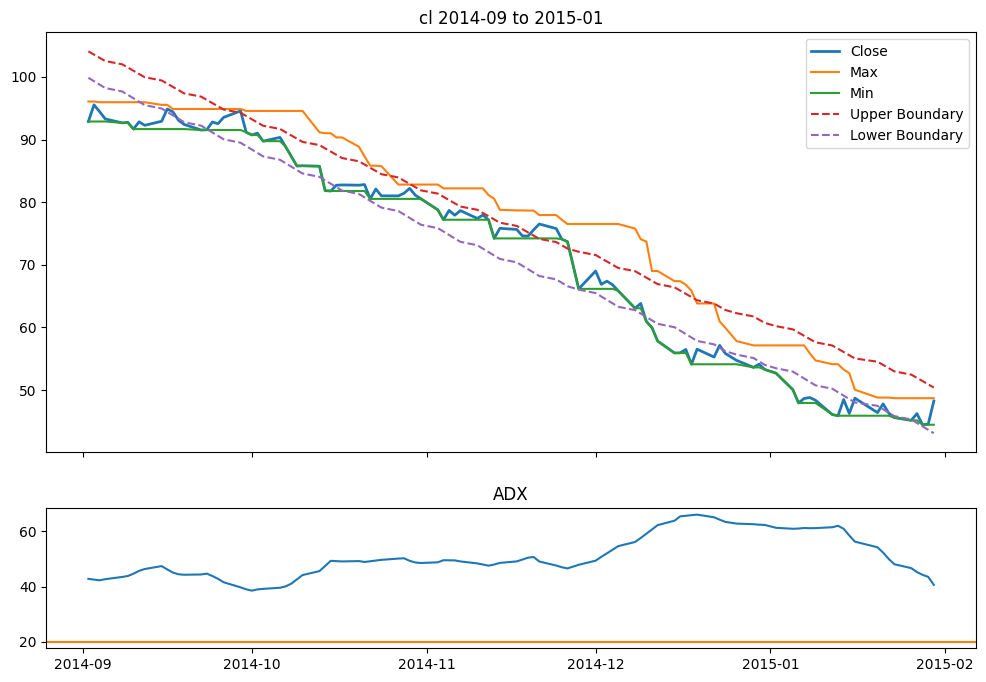

In [14]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), height_ratios=(3, 1), sharex=True)

ax1.plot(cl2014.index, cl2014["Close"], label="Close", linewidth= 2, color="C0")
ax1.plot(cl2014.index, cl2014["Max"], label="Max", color="C1")
ax1.plot(cl2014.index, cl2014["Min"], label="Min", color="C2")
ax1.plot(cl2014.index, upper, label="Upper Boundary", color="C3", linestyle="--")
ax1.plot(cl2014.index, lower, label="Lower Boundary", color="C4", linestyle="--")
ax1.set_title("cl 2014-09 to 2015-01")
ax1.legend(loc="upper right")

ax2.plot(cl2014["Adx"], label="ADX", color="C0")
ax2.axhline(y=20, color="C1")
ax2.set_title("ADX")

### Regress on upper and lower bound continously, on a 14 day window

In [15]:

def get_boundary_point_estimate(data):
    predictions = regress_boundary(data)
    # i = int(-(regress_window/2))
    i = -1
    return predictions[i]


cl["Upper"] = cl["Max"].rolling(window=regress_window).apply(get_boundary_point_estimate)
cl["Lower"] = cl["Min"].rolling(window=regress_window).apply(get_boundary_point_estimate)


Text(0.5, 1.0, 'ADX')

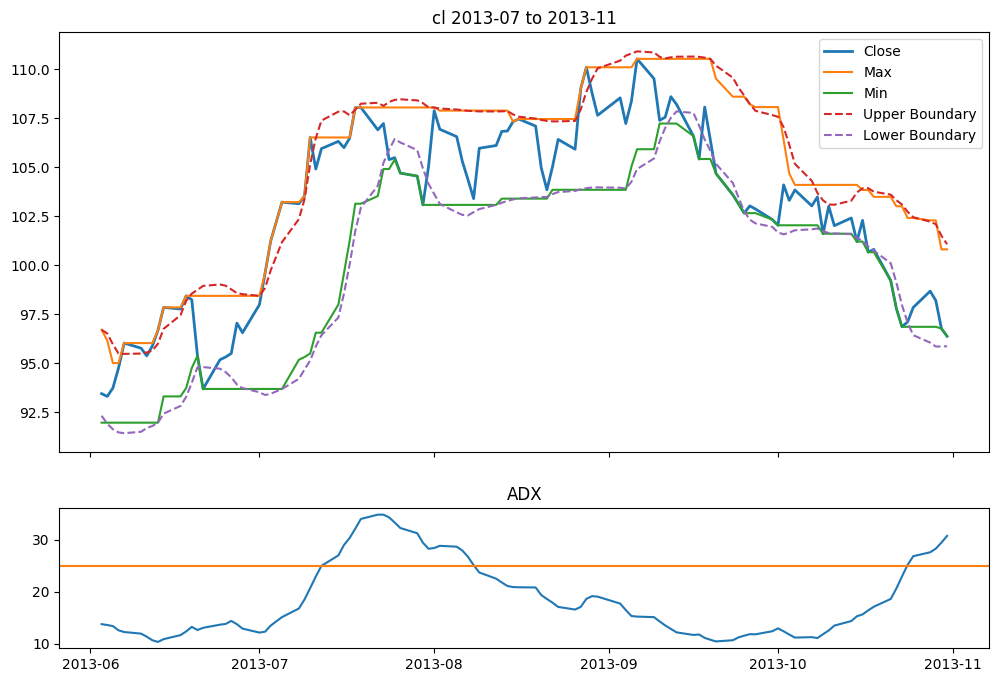

In [16]:
cl2013a = cl.loc["2013-06":"2013-10"]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), height_ratios=(3, 1), sharex=True)

ax1.plot(cl2013a.index, cl2013a["Close"], label="Close", linewidth= 2, color="C0")
ax1.plot(cl2013a.index, cl2013a["Max"], label="Max", color="C1")
ax1.plot(cl2013a.index, cl2013a["Min"], label="Min", color="C2")
ax1.plot(cl2013a.index, cl2013a["Upper"], label="Upper Boundary", color="C3", linestyle="--")
ax1.plot(cl2013a.index, cl2013a["Lower"], label="Lower Boundary", color="C4", linestyle="--")
ax1.set_title("cl 2013-07 to 2013-11")
ax1.legend(loc="upper right")

ax2.plot(cl2013a["Adx"], label="ADX", color="C0")
ax2.axhline(y=25, color="C1")
ax2.set_title("ADX")

## Signaling when consolidatin period is identified

We can see that the boundary somewhat captures the price channel. We can see that: 

1. between 2016-07 and 2016-10, the price is on on uptrend. It can be distinguished by the positive slope of the regression channel and ADX > 30. 
2. between 2017-01 and 2017-07, the price is trendless/consolidating. It can be distinguished by the close to zero slope of the regression channel and ADX < 30. 
3. There is a false breakout (downward price movement) in 2017, followed by a upward breakout around 2017-09

In [17]:
def get_model_parameters(data): 
    x = np.arange(0, data.shape[0])
    x = x.reshape(-1, 1)
    y = data

    model = LinearRegression()
    model.fit(x, y)

    return model.coef_[0]

cl["UpperSlope"] = cl["Upper"].rolling(window=regress_window).apply(get_model_parameters)
cl["LowerSlope"] = cl["Lower"].rolling(window=regress_window).apply(get_model_parameters)

cl.tail()

,Close,High,Low,Open,Volume,SMA5,SMA10,SMA20,SMA50,SMA100,SMA200,Max,Min,Max15,Min15,Adx,Upper,Lower,UpperSlope,LowerSlope
Date,,,,,,,,,,,,,,,,,,,,
2016-12-23,53.020000,53.279999,52.259998,52.680000,285166,52.562000,52.246001,51.089001,48.9302,47.3512,45.87595,53.020000,50.900002,52.980000,49.77,22.842276,53.015636,51.432365,0.031360,0.682604
2016-12-27,53.900002,54.099998,53.029999,53.290001,277306,52.918001,52.353001,51.430000,48.9994,47.4951,45.95625,53.900002,50.900002,53.020000,49.77,23.517368,53.309455,50.998729,0.031824,0.481804
2016-12-28,54.060001,54.369999,53.560001,53.930000,322535,53.284001,52.461001,51.871501,49.0736,47.6274,46.03405,54.060001,50.900002,53.900002,49.77,24.273816,53.630183,51.097820,0.043999,0.313443
2016-12-29,53.770000,54.209999,53.459999,53.660000,360194,53.540001,52.734001,52.088001,49.1502,47.7458,46.11700,54.060001,50.900002,54.060001,49.77,24.874942,53.892001,51.183274,0.061360,0.185494
2016-12-30,53.720001,54.090000,53.410000,53.869999,271094,53.694001,53.016001,52.221001,49.2188,47.8650,46.20390,54.060001,51.900002,54.060001,50.84,25.379474,54.094911,51.552547,0.086168,0.112123


Text(0.5, 0.98, 'Slope of the Upper and Lower Boundaries on conslidation period')

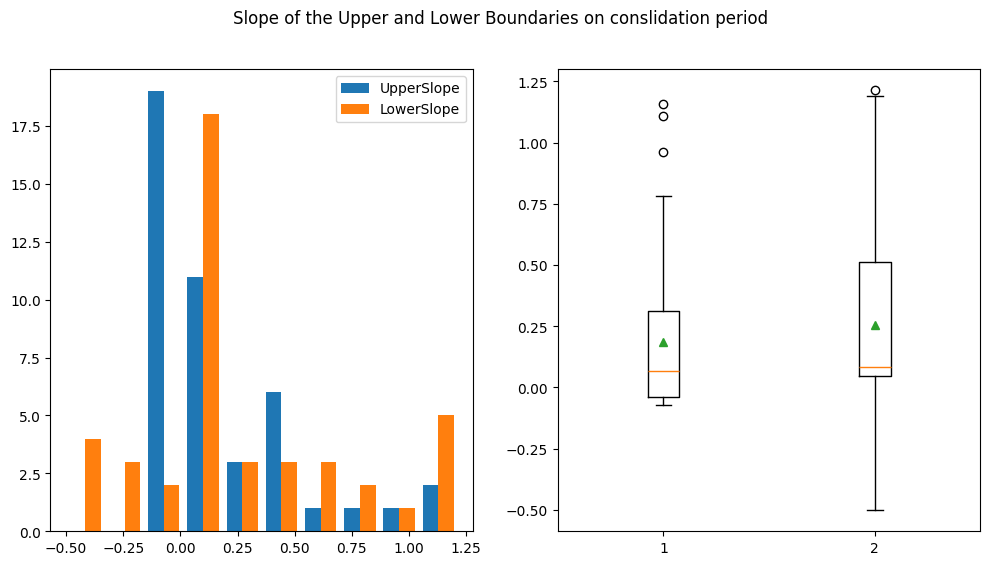

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.hist(cl.loc["2013-07-15":"2013-09-15", ["UpperSlope", "LowerSlope"]], bins=10)
ax1.legend(["UpperSlope", "LowerSlope"])

ax2.boxplot(cl.loc["2013-07-15":"2013-09-15", ["UpperSlope", "LowerSlope"]], showmeans=True)
# ax2.legend(["UpperSlope", "LowerSlope"])
fig.suptitle("Slope of the Upper and Lower Boundaries on conslidation period")

Text(0.5, 0.98, 'Slope of the Upper and Lower Boundaries on trending period')

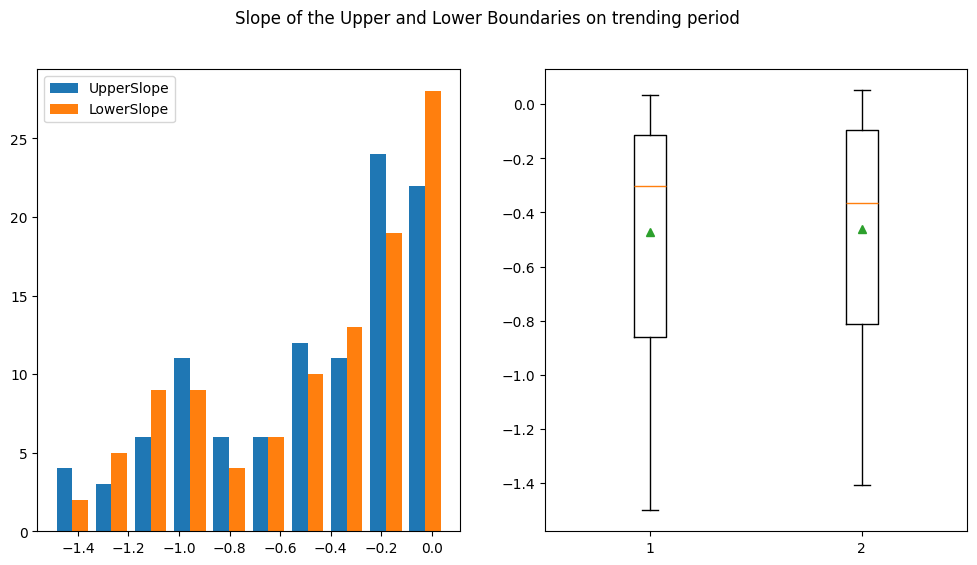

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.hist(cl.loc["2014-09":"2015-01", ["UpperSlope", "LowerSlope"]], bins=10)
ax1.legend(["UpperSlope", "LowerSlope"])

ax2.boxplot(cl.loc["2014-09":"2015-01", ["UpperSlope", "LowerSlope"]], showmeans=True)

fig.suptitle("Slope of the Upper and Lower Boundaries on trending period")


As we can see, in the consolidation period, the IQR is between -0.5 and 0.5. In trending period, the IQR is outside [-0.5, 0.5]. Let's use this as a criteria to identify consolidation period. 

### Generate trending range signal

The SignalAlgo does the following: 
1. taking 10 day max and min to find the upper and lower boundary
2. run linear regression on the boundaries 
3. if IQR of slopes from the continous linear regression models is between [-0.5, 0.5], a tranding range is established. 

   

In [20]:
def check_slope(slope):
    p25, p75 = np.percentile(slope, [25, 75])
    if np.isnan(p25) or np.isinf(p75):
        return False
    
    return True if (p25 > -0.5 and p75 < 0.5) else False

def is_in_trading_range_for_consecutive_5_days(flags):
    sum = np.sum(flags)
    return True if (sum == 5.0) else False

In [21]:
cl["upper_slope_flat"] = cl["UpperSlope"].rolling(window=regress_window).apply(check_slope)
cl["upper_slope_flat"] = cl["upper_slope_flat"].map(lambda x: True if x == 1.0 else False)

cl["lower_slope_flat"] = cl["LowerSlope"].rolling(window=regress_window).apply(check_slope)
cl["lower_slope_flat"] = cl["lower_slope_flat"].map(lambda x: True if x == 1.0 else False)

cl["in_trading_range"] = cl["upper_slope_flat"] & cl["lower_slope_flat"]

cl["tr_consecutive5"] = cl["in_trading_range"].rolling(window=5).apply(is_in_trading_range_for_consecutive_5_days)
cl["tr_consecutive5"] = cl["tr_consecutive5"].map(lambda x: True if x == 1.0 else False)
cl

,Close,High,Low,Open,Volume,SMA5,SMA10,SMA20,SMA50,SMA100,...,Min15,Adx,Upper,Lower,UpperSlope,LowerSlope,upper_slope_flat,lower_slope_flat,in_trading_range,tr_consecutive5
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,102.959999,103.180000,99.650002,99.699997,275481,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
2012-01-04,103.220001,103.739998,101.879997,102.989998,271711,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
2012-01-05,101.809998,103.730003,101.300003,103.290001,295615,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
2012-01-06,101.559998,102.800003,100.879997,101.349998,290458,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
2012-01-09,101.309998,102.150002,100.099998,101.919998,311866,102.171999,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23,53.020000,53.279999,52.259998,52.680000,285166,52.562000,52.246001,51.089001,48.9302,47.3512,...,49.77,22.842276,53.015636,51.432365,0.031360,0.682604,True,False,False,False
2016-12-27,53.900002,54.099998,53.029999,53.290001,277306,52.918001,52.353001,51.430000,48.9994,47.4951,...,49.77,23.517368,53.309455,50.998729,0.031824,0.481804,True,False,False,False
2016-12-28,54.060001,54.369999,53.560001,53.930000,322535,53.284001,52.461001,51.871501,49.0736,47.6274,...,49.77,24.273816,53.630183,51.097820,0.043999,0.313443,True,False,False,False


Text(0.5, 1.0, 'Is in trading range')

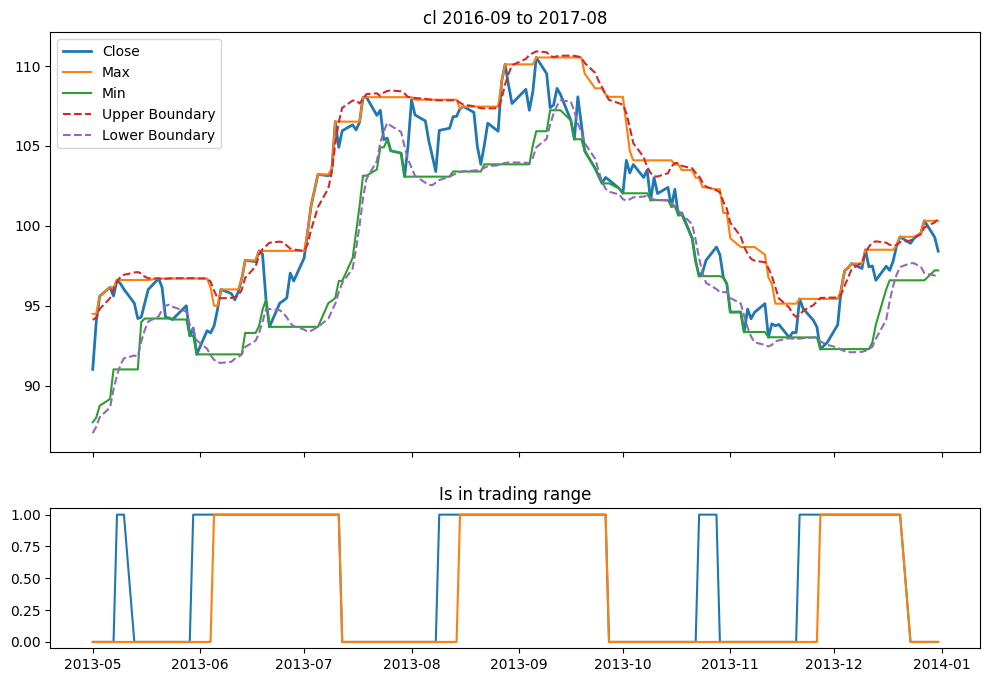

In [22]:
cl201314 = cl.loc["2013-05":"2013-12"]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), height_ratios=(3, 1), sharex=True)


ax1.plot(cl201314.index, cl201314["Close"], label="Close", linewidth= 2, color="C0")
ax1.plot(cl201314.index, cl201314["Max"], label="Max", color="C1")
ax1.plot(cl201314.index, cl201314["Min"], label="Min", color="C2")
ax1.plot(cl201314.index, cl201314["Upper"], label="Upper Boundary", color="C3", linestyle="--")
ax1.plot(cl201314.index, cl201314["Lower"], label="Lower Boundary", color="C4", linestyle="--")
ax1.set_title("cl 2016-09 to 2017-08")
ax1.legend(loc="upper left")

ax2.plot(cl201314["in_trading_range"], label="in_trading_range", color="C0")
ax2.plot(cl201314["tr_consecutive5"], label="in TR consecutive 5", color="C1")
ax2.set_title("Is in trading range")



To prevent false signal from trading range, we see if if the signal has been positive for at least 5 consecutive days, generating the orange line. 

Alternative is to tune hyperparameters: 
* min_max_window
* regression_window
* IQR range

## Enter/Exit of Long and short positions

1. when prices closes above or below previous 15 day high or low
2. stop loss is when price crosses 20 SMA and stays for 3 consecutive days. 

In [23]:
def enter_position(row): 
    is_consec = True if row["tr_consecutive5"] == 1.0 else False
    if is_consec and (row["Close"] > row["Max15"]): 
        return 1.0 
    elif is_consec and (row["Close"] < row["Min15"]):
        return -1.0

    return 0.0


In [24]:
def is_above_sma20_n_consec_days(data, n):
    data["is_above_sma20"] = data["Close"] > data["SMA20"]
    data["is_above_sma20_n_consec_days"] = data["is_above_sma20"].rolling(window=n).apply(
        lambda x: True if np.sum(x) == n else False)


def is_below_sma20_n_consec_days(data, n):
    data["is_below_sma20"] = data["Close"] < data["SMA20"]
    data["is_below_sma20_n_consec_days"] = data["is_below_sma20"].rolling(window=n).apply(
        lambda x: True if np.sum(x) == n else False)





In [25]:
def safe_iloc(df_or_series, idx, default=None):
    if -len(df_or_series) <= idx < len(df_or_series):
        return df_or_series.iloc[idx]
    else:
        return default


def hold_exit_positions(data):     
    data["Weight2"] = data["Weight"]
    buy_and_sell = data.loc[data["Weight2"] != 0.0].copy()

    for i, row in buy_and_sell.iterrows():
        start = row.name
        start_idx = data.index.get_loc(start)
        df_onward = data.iloc[start_idx+1:]
        weight2_idx = data.columns.get_loc("Weight2")
        if(row["Weight2"] == 1.0): 
            flag1 = df_onward["is_below_sma20_n_consec_days"].map({1.0: True, 0.0: False})
            prices_cross = df_onward[flag1]
            price_cross = safe_iloc(prices_cross, 0)

            flag2 = df_onward["Weight2"] != 0.0
            next_signals = df_onward[flag2]
            next_signal = safe_iloc(next_signals, 0)

            if(price_cross is not None and next_signal is not None):
                if price_cross.name <= next_signal.name:
                    end_idx = data.index.get_loc(price_cross.name)
                    data.iloc[start_idx + 1: end_idx, weight2_idx] = 1.0
                    data.iloc[end_idx, weight2_idx] = 0.0
                elif price_cross.name > next_signal.name:
                    end_idx = data.index.get_loc(next_signal.name)
                    data.iloc[start_idx + 1: end_idx, weight2_idx] = 1.0
            elif(price_cross is not None and next_signal is None):
                end_idx = data.index.get_loc(price_cross.name)
                data.iloc[start_idx + 1: end_idx, weight2_idx] = 1.0
                data.iloc[end_idx, weight2_idx] = 0.0
            elif(price_cross is None) and (next_signal is not None):
                end_idx = data.index.get_loc(next_signal.name)
                data.iloc[start_idx + 1: end_idx, weight2_idx] = 1.0
            else: 
                continue
        elif(row["Weight2"] == -1.0): 
            flag1 = df_onward["is_above_sma20_n_consec_days"].map({1.0: True, 0.0: False})
            prices_cross = df_onward[flag1]
            price_cross = safe_iloc(prices_cross, 0)

            flag2 = df_onward["Weight2"] != 0.0
            next_signals = df_onward[flag2]
            next_signal = safe_iloc(next_signals, 0)

            if(price_cross is not None and next_signal is not None):
                if price_cross.name <= next_signal.name:
                    end_idx = data.index.get_loc(price_cross.name)
                    data.iloc[start_idx + 1: end_idx, weight2_idx] = -1.0
                    data.iloc[end_idx, weight2_idx] = 0.0
                elif price_cross.name > next_signal.name:
                    end_idx = data.index.get_loc(next_signal.name)
                    data.iloc[start_idx + 1: end_idx, weight2_idx] = -1.0
            elif(price_cross is not None and next_signal is None):
                end_idx = data.index.get_loc(price_cross.name)
                data.iloc[start_idx + 1: end_idx, weight2_idx] = -1.0
                data.iloc[end_idx, weight2_idx] = 0.0
            elif(price_cross is None) and (next_signal is not None):
                end_idx = data.index.get_loc(next_signal.name)
                data.iloc[start_idx + 1: end_idx, weight2_idx] = -1.0
            else: 
                continue

In [26]:
is_above_sma20_n_consec_days(cl, 3)
is_below_sma20_n_consec_days(cl, 3)

cl["Weight"] = cl.apply(enter_position, axis=1)
hold_exit_positions(cl)

In [27]:
def diagnose(data, title="Price Chart"): 
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8), height_ratios=(4, 1, 1, 1), sharex=True)

    ax1.plot(data.index, data["Close"], label="Close", linewidth= 2, color="C0")
    ax1.plot(data.index, data["SMA20"], label="SMA20", color="C1")
    ax1.plot(data.index, data["Max"], label="Max", color="C2")
    ax1.plot(data.index, data["Min"], label="Min", color="C3")
    ax1.plot(data.index, data["Upper"], label="Upper Boundary", color="C4", linestyle="--")
    ax1.plot(data.index, data["Lower"], label="Lower Boundary", color="C5", linestyle="--")
    ax1.set_title(title)
    ax1.legend(loc="upper left")

    ax2.plot(data["in_trading_range"], label="in_trading_range", color="C0")
    ax2.plot(data["tr_consecutive5"], label="in TR consecutive 5", color="C1")
    ax2.legend(loc="upper left")
    ax2.set_title("Is in trading range")

    ax4.plot(data.index, data["is_above_sma20_n_consec_days"], label="Above", color="C0")
    ax4.plot(data.index, data["is_below_sma20_n_consec_days"], label="Below", color="C1")
    ax4.legend(loc="upper left")
    ax4.set_title("Is above/below 20 days SMA for 3 consecutive days")

    ax3.plot(data.index, data["Weight"], label="Weight", color="C0")
    ax3.plot(data.index, data["Weight2"].map({1.0: 0.75, 0.0: 0.0, -1.0:-0.75}),
            label="Ctn. Weight2", color="C1")

    ax3.legend(loc="upper left")
    ax3.set_title("Trading algo, weights")
    

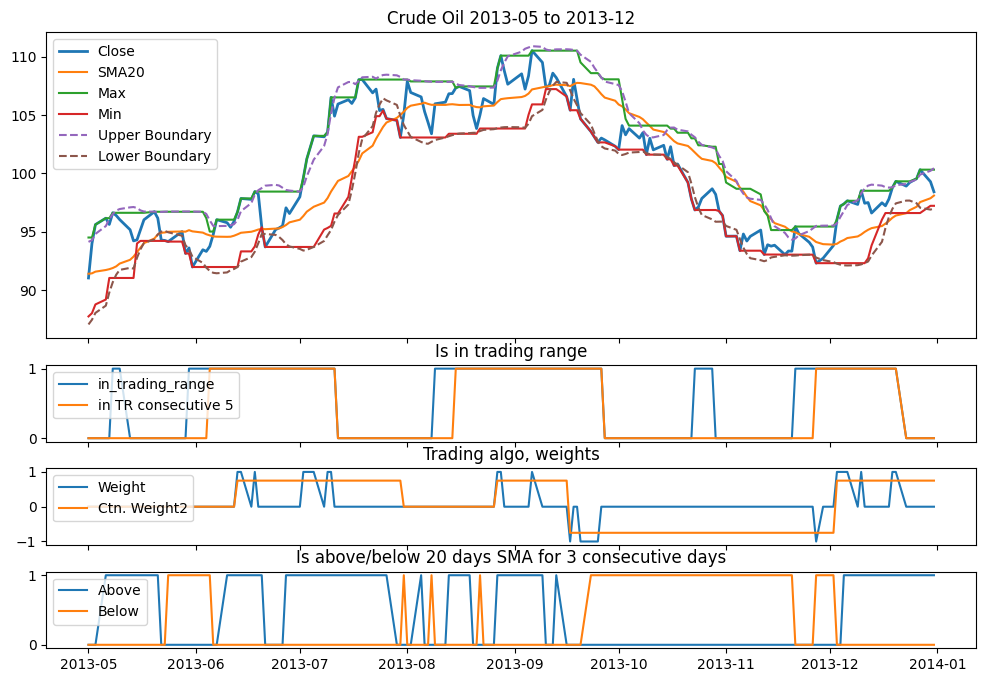

In [28]:
cl201314 = cl.loc["2013-05":"2013-12"]
diagnose(cl201314, "Crude Oil 2013-05 to 2013-12")

## Backtesting

In [34]:
def run_bt(data, title="Price Chart"):
    weights = data["Weight2"].to_frame(name="Close")
    stratgy = bt.Strategy("Breakout", 
                        [bt.algos.WeighTarget(weights),
                        bt.algos.Rebalance()])
    backtest = bt.Backtest(stratgy, data["Close"].to_frame())
    result = bt.run(backtest)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    line1 = ax1.plot(data["Close"], label="Crude Oil", color="C0")
    line2 = ax1.plot(data["SMA20"], label="SMA20", color="C1")

    ax1b = ax1.twinx()
    line3 = ax1b.plot(data["Weight2"], label="Buy/Sell Signal", color="C2")
    lines = line1 + line2 + line3
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc="upper left", fontsize=10)
    ax1.set_title(title)
    
    ax2.plot(result.prices, label="Breakout", color="C2")
    ax2.set_title("Backtest Result")
    plt.show()

### Period 1

100%|██████████| 1/1 [00:00<00:00, 37.12it/s]


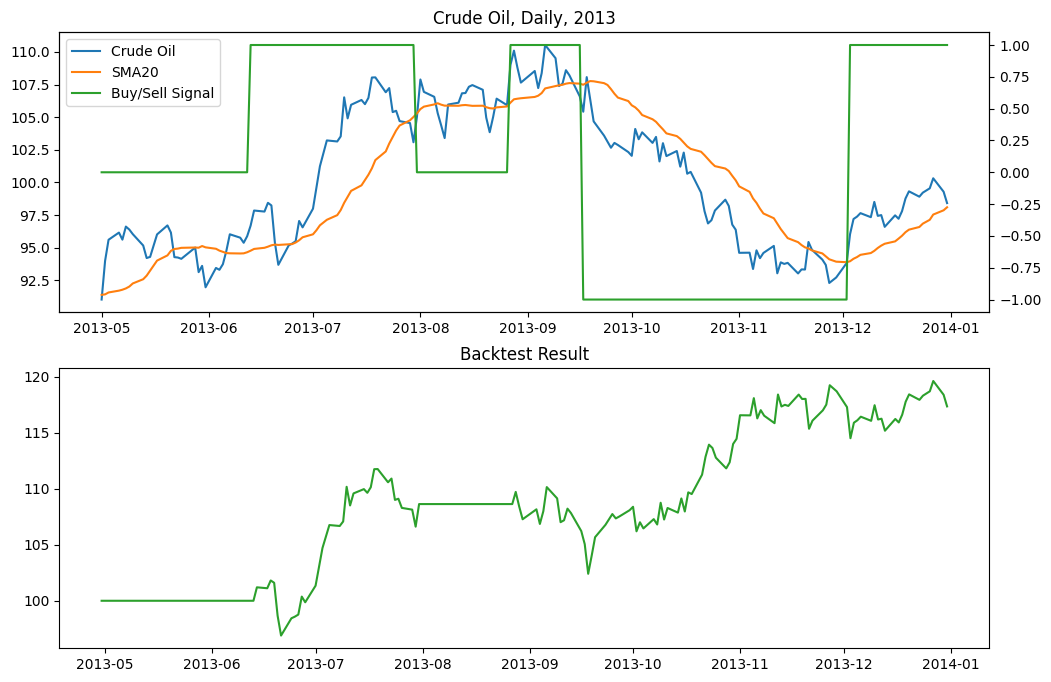

In [36]:
period1 = cl.loc["2013-05":"2013-12"]
run_bt(period1, "Crude Oil, Daily, 2013")

Summary: 
* The algo correctly identifies a upward breakout around 2013-06-15 and enters the long position. 
It closes the long position around 2013-08 when price falls below SMA. 
* 2013-9, the algo suffers loses due to false breakout
* The algo correctly identifies a downward breakout. It makes considerable gain until 2013-12. 



### Period 2

100%|██████████| 1/1 [00:00<00:00, 17.58it/s]


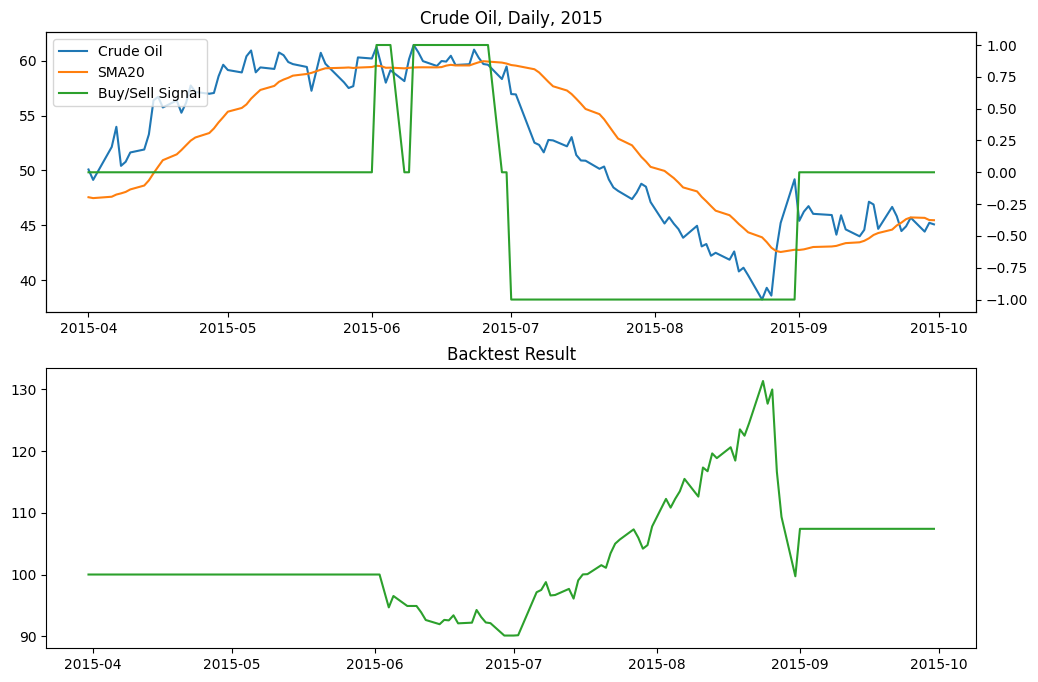

In [39]:
period2 = cl.loc["2015-04":"2015-09"]
run_bt(period2, "Crude Oil, Daily, 2015")

### Diagnose

**Problem 1**. 

Looks like that the algo suffers a drawdown from 2015-06 to 2015-07 due to false breakout in the top of the range. 

A potential solution is to improve the **enter_position()** function

Instead of having  

> if is_consec and (row["Close"] > row["Max15"]): 

We can have 
>     if is_consec and (row["Close"] > row["Max15"] + ATR): 



**Problem2**. 

Just before 2015-09, the price violently rises above the SMA20. According the to rule in the algorithm, the position is only closed after price stays above the SMA20 for __3 consecutive days__. This is used to filter out short term price fluctuation. 

A solution is to define a threshold for drawdowns. If the portfolio suffers a 10% drawdown, or, the price changes 5-10%, or price changes 2ATR. Exit position. 